In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import skimage.segmentation as seg
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import skimage.color as color
from skimage.util import img_as_ubyte

In [3]:
# Reading the image
image_list = [
    "business-man-1238376.jpg",  #        0
    "indian-people-1424719.jpg",  #       1
    "legos-people-group-1240136.jpg",  #  2
    "people-1241254.jpg",  #              3
    "people-1433035.jpg",  #              4
    "people-1498352.jpg",  #              5
    "people-5-1545709.jpg",  #            6
    "people-5-1546139.jpg",  #            7
    "people-listening-1239292.jpg",  #    8
    "cross_walk.jpg",  #                  9
    "cross_walk_she.png",  #              10
    "cross_walk_he.png",  #               11
]

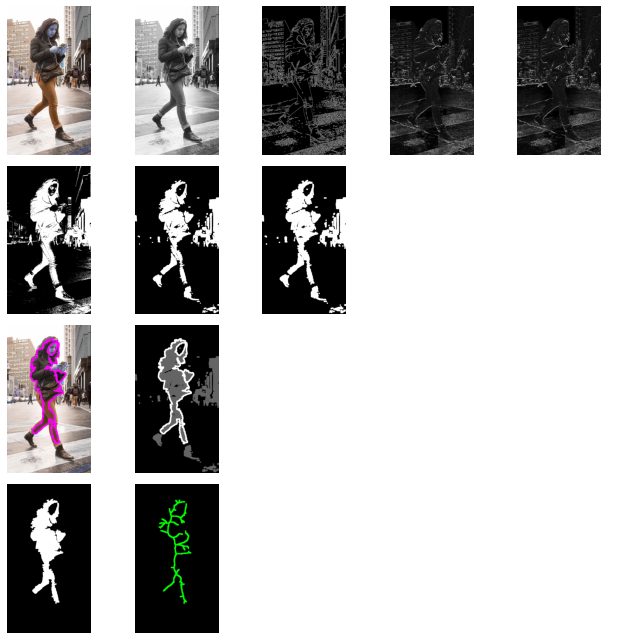

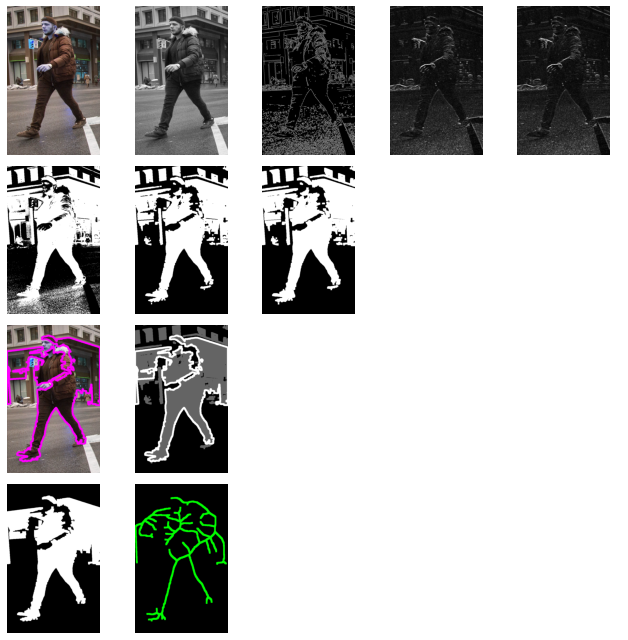

In [4]:
def makeBinaryMask(image_name):
    ## Initial image and simple filters
    image = cv2.imread(image_name, cv2.COLOR_RGB2BGR)
    image_initial = image.copy()
    image_edges = cv2.Canny(image,100,200)
    # image = img_as_ubyte(color.label2rgb(seg.slic(image, n_segments=250, multichannel=True), image, kind='avg'))
    # image = img_as_ubyte(color.label2rgb(seg.felzenszwalb(image), image, kind='avg'))
    # image_segmented = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image_gray = image.copy()
    mask_x = np.array([-1,1])
    mask_y = mask_x.T
    K_0 = np.ones((4,4), dtype='uint8')
    image_Ix = image_gray.copy()
    image_Ix = cv2.filter2D(image_Ix, -1, mask_x)
    image_Ix = cv2.dilate(image_Ix, K_0)
    image_Iy = image_gray.copy()
    image_Iy = cv2.filter2D(image_Iy, -1, mask_y)
    image_Iy = cv2.dilate(image_Iy, K_0)


    ## Binary images
    threshold, image = cv2.threshold(image, 99, 100, cv2.THRESH_BINARY_INV) # change of 99, 100 to 79, 80 makes 'he' better but 'she' worse
    image_binary = image.copy()
    K_1 = np.ones((4,4), dtype='uint8')
    image = cv2.erode(image, K_1)
    image = cv2.erode(image, K_1)
    K_1b = np.ones((8,8), dtype='uint8')
    image = cv2.dilate(image, K_1b)
    K_1a = np.ones((2,2), dtype='uint8')
    image = cv2.erode(image, K_1a)
    image_binary_erode = image.copy()
    K_1c = np.ones((3,3), dtype='uint8')
    # height = image.shape[1]
    # width = image.shape[0]
    # init = np.array([(0, 0), (width, 0), (width, height), (0, height), (0, 0)])
    # snake = active_contour(gaussian(image, 3, preserve_range=False), init, alpha=0.015, beta=100, gamma=-0.01)
    # fig, ax = plt.subplots(figsize=(7, 7))
    # ax.imshow(image, cmap=plt.cm.gray)
    # ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    # ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    # ax.set_xticks([]), ax.set_yticks([])
    # ax.axis([0, image.shape[1], image.shape[0], 0])
    # plt.show()
    image = cv2.dilate(image, K_1c)
    # image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, (22,22))
    # image = cv2.morphologyEx(image, cv2.MORPH_OPEN, (12,12))
    
    # im_floodfill = image.copy()
    # h, w = image.shape[:2]
    # mask = np.zeros((h+2, w+2), np.uint8)
    # cv2.floodFill(im_floodfill, mask, (0,0), 255)
    # im_floodfill_inv = cv2.bitwise_not(im_floodfill)
    # im_out = image | im_floodfill_inv
    # plt.imshow(im_out, cmap='gray');

    image_binary_erode_dilate = image.copy()


    ## Contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    biggest_contour = sorted(contours, key=cv2.contourArea, reverse= True)[0]
    image_binary_erode_dilate_contours = image.copy()
    image_binary_erode_dilate_contours = cv2.drawContours(image_binary_erode_dilate_contours, [biggest_contour], -1, (255,0,255), 10)
    image_contours = image_initial.copy()
    image_contours = cv2.drawContours(image_contours, [biggest_contour], -1, (255,0,255), 10)


    ## Binary mask and skeletonization
    binary_mask = np.zeros(image_initial.shape, dtype='uint8')
    cv2.drawContours(binary_mask, [biggest_contour], -1, (255,255,255), thickness=cv2.FILLED)
    from skimage.morphology import skeletonize
    skeleton_mask = (binary_mask == 255)
    image_mask_skeletonize = skeletonize(skeleton_mask)
    K_2 = np.ones((10,10), dtype='uint8')
    image_mask_skeletonize = cv2.dilate(image_mask_skeletonize, K_2)


    ## Show results
    f, axs = plt.subplots(4, 5, figsize=(9, 9))
    axs[0,0].imshow(image_initial)
    axs[0,0].axis('off')
    axs[0,1].imshow(image_gray, cmap='gray')
    axs[0,1].axis('off')
    axs[0,2].imshow(image_edges, cmap='gray')
    axs[0,2].axis('off')
    axs[0,3].imshow(image_Ix, cmap='gray')
    axs[0,3].axis('off')
    axs[0,4].imshow(image_Iy, cmap='gray')
    axs[0,4].axis('off')

    axs[1,0].imshow(image_binary, cmap="gray")
    axs[1,0].axis('off')
    axs[1,1].imshow(image_binary_erode, cmap="gray")
    axs[1,1].axis('off')
    axs[1,2].imshow(image_binary_erode_dilate, cmap="gray")
    axs[1,2].axis('off')
    # axs[1,3].
    axs[1,3].axis('off')
    # axs[0,4].
    axs[1,4].axis('off')

    axs[2,0].imshow(image_contours)
    axs[2,0].axis('off')
    axs[2,1].imshow(image_binary_erode_dilate_contours, cmap='gray')
    axs[2,1].axis('off')
    # axs[2,2].
    axs[2,2].axis('off')
    # axs[2,3].
    axs[2,3].axis('off')
    # axs[0,4].
    axs[2,4].axis('off')

    axs[3,0].imshow(binary_mask)
    axs[3,0].axis('off')
    axs[3,1].imshow(image_mask_skeletonize)
    axs[3,1].axis('off')
    # axs[3,2].
    axs[3,2].axis('off')
    # axs[3,3].
    axs[3,3].axis('off')
    # axs[0,4].
    axs[3,4].axis('off')

    f.tight_layout()

image_nr = 10
image_name = "images/" + image_list[image_nr]
makeBinaryMask(image_name)

image_nr = 11
image_name = "images/" + image_list[image_nr]
makeBinaryMask(image_name)

In [5]:
image_test_list = [
    "cross_walk_she.png",
    "cross_walk_he.png",
    "Screenshot 2022-04-09 at 16.23.52.png",
    "Screenshot 2022-04-09 at 16.25.05.png",
    "Screenshot 2022-04-09 at 16.26.37.png",
    "Screenshot 2022-04-09 at 16.24.03.png",
    "Screenshot 2022-04-09 at 16.25.25.png",
    "Screenshot 2022-04-09 at 16.26.57.png",
    "Screenshot 2022-04-09 at 16.24.19.png", 
    "Screenshot 2022-04-09 at 16.25.39.png", 
    "Screenshot 2022-04-09 at 16.27.07.png",
    "Screenshot 2022-04-09 at 16.24.41.png",
    "Screenshot 2022-04-09 at 16.25.57.png", 
    "Screenshot 2022-04-09 at 16.27.19.png",
    "Screenshot 2022-04-09 at 16.24.48.png", 
    "Screenshot 2022-04-09 at 16.26.07.png", 
    "Screenshot 2022-04-09 at 16.27.34.png",
    "Screenshot 2022-04-09 at 16.24.59.png", 
    "Screenshot 2022-04-09 at 16.26.16.png",
    "Screenshot 2022-04-09 at 16.44.23.png"
]

In [8]:
def makeBinaryMask_test(image_name):
    ## Initial image and simple filters
    image = cv2.imread(image_name, cv2.COLOR_RGB2BGR)
    image_initial = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.GaussianBlur(image, (5,5), 0)
    # image = img_as_ubyte(color.label2rgb(seg.slic(image, n_segments=150, multichannel=True), image, kind='avg'))
    image_gray = image.copy()
    mask_x = np.array([-1,1])
    mask_y = mask_x.T
    K_0 = np.ones((4,4), dtype='uint8')
    image_Ix = image_gray.copy()
    image_Ix = cv2.filter2D(image_Ix, -1, mask_x)
    image_Ix = cv2.dilate(image_Ix, K_0)
    image_Iy = image_gray.copy()
    image_Iy = cv2.filter2D(image_Iy, -1, mask_y)
    image_Iy = cv2.dilate(image_Iy, K_0)


    ## Binary images
    threshold, image = cv2.threshold(image, 99, 100, cv2.THRESH_BINARY_INV) # change of 99, 100 to 79, 80 makes 'he' better but 'she' worse
    K_1 = np.ones((4,4), dtype='uint8')
    image = cv2.erode(image, K_1)
    image = cv2.erode(image, K_1)
    K_1b = np.ones((8,8), dtype='uint8')
    image = cv2.dilate(image, K_1b)
    K_1a = np.ones((2,2), dtype='uint8')
    image = cv2.erode(image, K_1a)
    K_1c = np.ones((3,3), dtype='uint8')
    image = cv2.dilate(image, K_1c)


    ## Contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    biggest_contour = sorted(contours, key=cv2.contourArea, reverse= True)[0]
    image_binary_erode_dilate_contours = image.copy()
    image_binary_erode_dilate_contours = cv2.drawContours(image_binary_erode_dilate_contours, [biggest_contour], -1, (255,0,255), 10)
    image_contours = image_initial.copy()
    image_contours = cv2.drawContours(image_contours, [biggest_contour], -1, (255,0,255), 10)


    ## Binary mask and skeletonization
    binary_mask = np.zeros(image_initial.shape, dtype='uint8')
    cv2.drawContours(binary_mask, [biggest_contour], -1, (255,255,255), thickness=cv2.FILLED)
    from skimage.morphology import skeletonize
    skeleton_mask = (binary_mask == 255)
    image_mask_skeletonize = skeletonize(skeleton_mask)
    K_2 = np.ones((10,10), dtype='uint8')
    image_mask_skeletonize = cv2.dilate(image_mask_skeletonize, K_2)

    return binary_mask

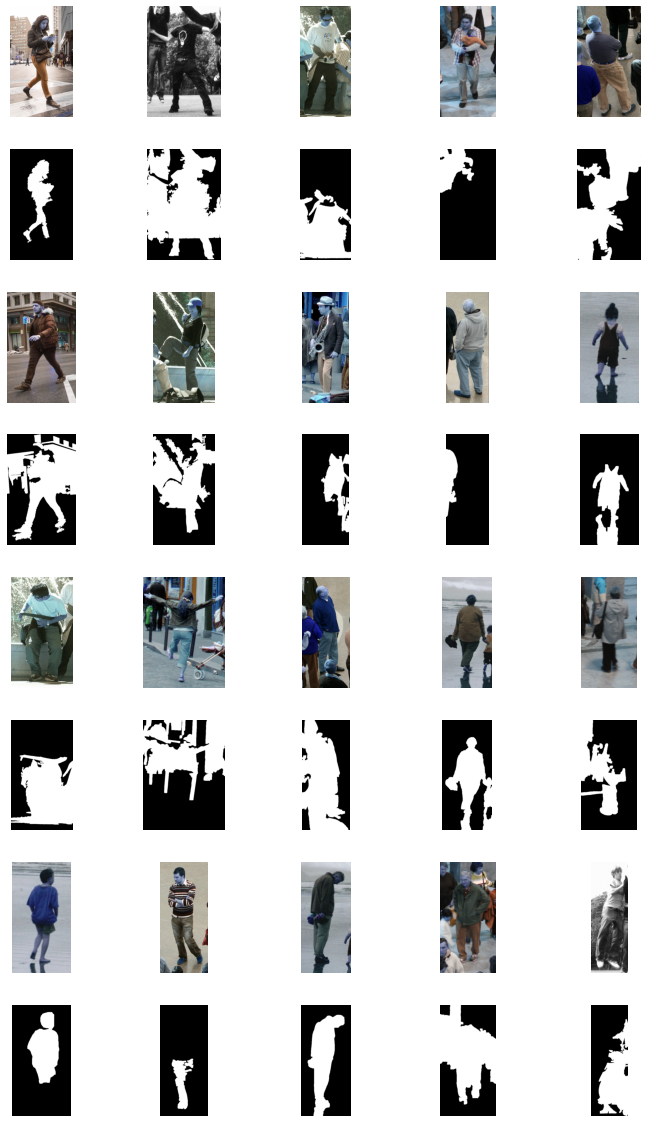

In [9]:
f, axs = plt.subplots(8, 5, figsize=(10, 16))
f.tight_layout()

index = 0
for j in range(5):
    for i in range(0, 8, 2):
        image_name = "images/" + image_test_list[index]
        image = cv2.imread(image_name, cv2.COLOR_RGB2BGR)
        index += 1
        axs[i,j].axis('off')
        axs[i,j].imshow(image)

index = 0
for j in range(5):
    for i in range(1, 8, 2):
        image_name = "images/" + image_test_list[index]
        image = makeBinaryMask_test(image_name)
        index += 1
        axs[i,j].axis('off')
        axs[i,j].imshow(image)
